### Applied Data Science: Hypothesis Testing

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
noise = pd.read_csv('data/NOISE.csv')

In [3]:
noise.head()

,Decibels,Intensity
0,99.0,High
1,97.1,High
2,96.9,High
3,95.8,High
4,87.0,High


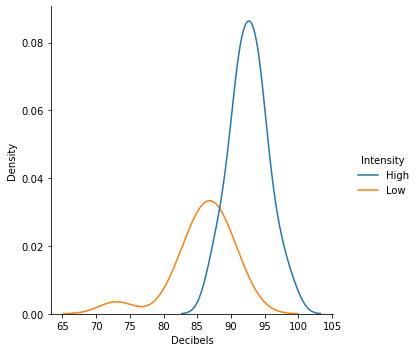

In [6]:
#sns.distplot

sns.displot(x='Decibels', hue = 'Intensity', data = noise, kind = 'kde')

In [9]:
high_intensity = noise.loc[noise['Intensity'] == 'High']['Decibels']
low_intensity = noise.loc[noise['Intensity'] == 'Low']['Decibels']

In [10]:
stats.skewtest(high_intensity)

SkewtestResult(statistic=0.30095591782066505, pvalue=0.7634481094555972)

In [11]:
stats.skewtest(low_intensity)

SkewtestResult(statistic=-2.6609975931742897, pvalue=0.007790951403178413)

### Confidence Interval

$$\mu \pm t*SE$$

In [12]:
len(high_intensity)

28

In [13]:
t = stats.t(27)

In [14]:
t.interval(.95)

(-2.0518305164802833, 2.0518305164802833)

In [15]:
#alpha = 0.5

$$H_0: \mu_0 = \mu_1$$
$$H_a: \mu_0 \neq \mu_1$$

In [16]:
stats.ttest_ind(high_intensity, low_intensity)

Ttest_indResult(statistic=6.100791571333459, pvalue=3.1099028883551377e-07)

### Reading Intervention

In [17]:
reading = pd.read_csv('data/DRP.csv')

In [18]:
reading.head()

,id,group,g,drp
0,1,Treat,0,24
1,2,Treat,0,56
2,3,Treat,0,43
3,4,Treat,0,59
4,5,Treat,0,58


In [22]:
treatment = reading.loc[reading['group'] == 'Treat']['drp']
control = reading.loc[reading['group'] == 'Control']['drp']

In [29]:
len(treatment)

21

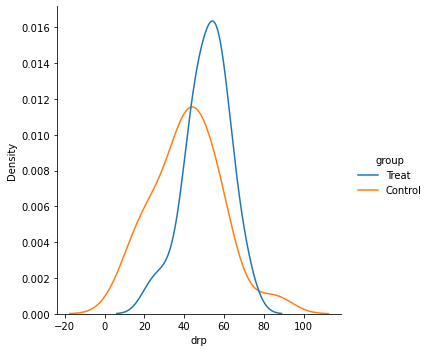

In [23]:
sns.displot(x = 'drp', hue = 'group', data = reading, kind = 'kde')

- $$ \alpha = 0.05$$
- $$H_0: \mu_t = \mu_c$$
- $$H_a: \mu_t > \mu_c$$

In [25]:
t_stat, p = stats.ttest_ind(treatment, control)

In [26]:
p/2

0.01431474141612286

In [27]:
cars = pd.read_csv('data/JOCKO.csv')

In [28]:
cars.head()

,Car,Jocko,Other
0,1,1410,1250
1,2,1550,1300
2,3,1250,1250
3,4,1300,1200
4,5,900,950


<AxesSubplot:xlabel='Jocko', ylabel='Density'>

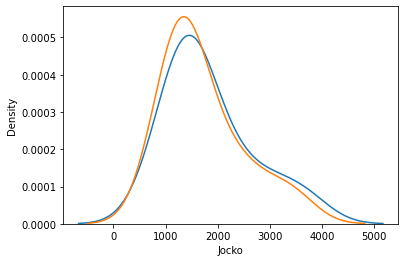

In [32]:
fig, ax = plt.subplots()
sns.kdeplot(x = cars['Jocko'],  ax = ax)
sns.kdeplot(x = cars['Other'],  ax = ax)

In [34]:
stats.ttest_ind(cars['Jocko'], cars['Other'])

Ttest_indResult(statistic=0.32060397670781055, pvalue=0.7522026578824064)

In [35]:
weight = pd.read_csv('data/WTGAIN.csv')

In [36]:
weight.head()

,id,wtb,wta
0,1,55.7,61.7
1,2,54.9,58.8
2,3,59.6,66.0
3,4,62.3,66.2
4,5,74.2,79.0


In [37]:
weight['weight_change'] = weight['wta'] - weight['wtb']

In [39]:
weight.head()

,id,wtb,wta,weight_change
0,1,55.7,61.7,6.0
1,2,54.9,58.8,3.9
2,3,59.6,66.0,6.4
3,4,62.3,66.2,3.9
4,5,74.2,79.0,4.8


In [41]:
stats.ttest_1samp(weight['weight_change'], 16)

Ttest_1sampResult(statistic=-25.819924716508876, pvalue=7.582374203406457e-14)

In [48]:
!git remote -v

origin	https://github.com/jfkoehler/september_ads.git (fetch)
origin	https://github.com/jfkoehler/september_ads.git (push)
